In [130]:
import pandas as pd

In [131]:
data = pd.read_csv('/content/Bengaluru_House_Data.csv', )

In [132]:
data.shape

(13320, 9)

In [133]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [134]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [135]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [136]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

droping some features

In [137]:
data = data.drop(columns = ['area_type','society','balcony','availability'], axis=1)

In [138]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [139]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

since there aren't many missing rows values, we will drop them all

In [140]:
data.dropna(inplace=True)

In [141]:
data.shape

(13246, 5)

feature engineering

In [142]:
data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [143]:
data['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13246, dtype: int64

In [144]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int64  
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 620.9+ KB


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int64  
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 620.9+ KB


In [147]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [148]:
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

In [149]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [150]:
data.shape

(13246, 5)

In [151]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

In [152]:
data.shape

(13246, 6)

In [153]:
data.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [154]:
data['location'] = data.location.apply(lambda x: x.strip())
locations = data['location'].value_counts(ascending=False)
locations

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [155]:
locations.values.sum()

13246

In [156]:
locations_less_than_10 = locations[locations < 10]

In [157]:
data['location'] = data['location'].apply(lambda x : 'other' if x in locations_less_than_10 else x)

In [158]:
data.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


removing outliers

In [159]:
data.shape

(13246, 6)

In [160]:
import numpy as np

In [161]:
def outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data = outliers(data)
data.shape

(11389, 6)

In [162]:
data.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,85.0,9139.784946


In [163]:
data.shape

(11389, 6)

In [164]:
data['location'].unique()

array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billek

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [166]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)
# df8 = df7.copy()
data.shape

(8039, 6)

In [167]:
data.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,85.0,9139.784946


In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
encoder = LabelEncoder()

In [173]:
data['location'] = encoder.fit_transform(data['location'])

In [174]:
data.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,0,4,2850.0,4.0,428.0,15017.543860
1,0,3,1630.0,3.0,194.0,11901.840491
2,0,6,1200.0,6.0,125.0,10416.666667
3,0,3,1875.0,2.0,235.0,12533.333333
4,0,7,930.0,4.0,85.0,9139.784946


In [187]:
X = data.drop(columns = ['price', 'price_per_sqft'], axis = 1)

In [188]:
X

,location,size,total_sqft,bath
0,0,4,2850.0,4.0
1,0,3,1630.0,3.0
2,0,6,1200.0,6.0
3,0,3,1875.0,2.0
4,0,7,930.0,4.0
...,...,...,...,...
11380,254,7,1400.0,7.0
11383,254,2,1353.0,2.0
11384,254,1,812.0,1.0
11387,254,4,1200.0,5.0


In [189]:
y = data['price']

In [190]:
y

0        428.0
1        194.0
2        125.0
3        235.0
4         85.0
         ...  
11380    218.0
11383    110.0
11384     26.0
11387    325.0
11388    400.0
Name: price, Length: 8039, dtype: float64

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [192]:
from sklearn.svm import SVR

In [193]:
model = SVR()

In [194]:
model.fit(X_train, y_train)

SVR()

In [195]:
y_pred = model.predict(X_test)

In [196]:
from sklearn.metrics import r2_score

In [197]:
score = r2_score(y_test, y_pred)

In [198]:
score

0.3818684642338144

In [203]:
import matplotlib.pyplot as plt

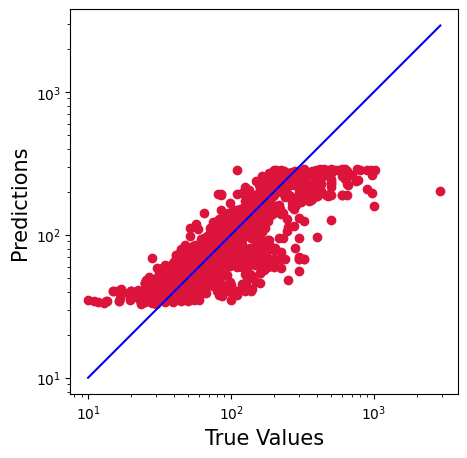

In [210]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [199]:
def predict_price(location,sqft,bath,size):
    x = [location, size, sqft, bath]

    return model.predict([x])

In [200]:
predict_price(0, 4, 2850, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([180.45874614])

In [211]:
predict_price(0, 3, 1630, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([135.7462558])